# Adult Income
### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

sns.set(style="darkgrid")
np.random.seed(123)

In [2]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\Users\\jdcal\\anaconda3\\envs\\Adult_Income\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

## Load Data

In [3]:
df = pd.read_csv('./Data/adult.csv.zip')
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Missing values
- workclass
- Occuptaion
- Native country

<AxesSubplot:xlabel='workclass', ylabel='count'>

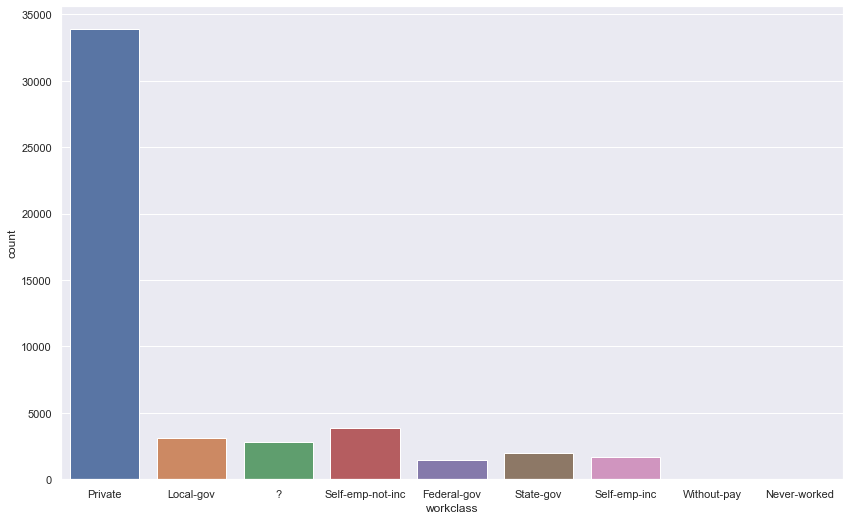

In [5]:
a4_dims = (14, 8.7)
fig, ax = plt.subplots(figsize=a4_dims,ncols=1)
sns.countplot(x="workclass",data=df)

In [6]:
print("percentage of Null values in workclass feature - {0:.2f}%".format((len((df[df['workclass']=='?']))/len(df['workclass']))*100))
print("Percentage of Null values in occupation feature - {0:.2f}%".format((len((df[df['occupation']=='?']))/len(df['occupation']))*100))
print("Percentage of Null values in Native-country -{0:.2f}%".format((len((df[df['native-country']=='?']))/len(df['native-country']))*100))

percentage of Null values in workclass feature - 5.73%
Percentage of Null values in occupation feature - 5.75%
Percentage of Null values in Native-country -1.75%


In [7]:
shape_with_nullvalues= df.shape
print("Shape before removing null values  {}".format(shape_with_nullvalues))

df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']

print('Shape after removing null values {}'.format(df.shape))
print("percentage of data removed - {0:.2f}%".format(((shape_with_nullvalues[0]-df.shape[0])/shape_with_nullvalues[0])*100))

Shape before removing null values  (48842, 15)
Shape after removing null values (45222, 15)
percentage of data removed - 7.41%


## Exploratory Data Analysis

[Text(0, 0, 'Machine-op-inspct'),
 Text(1, 0, 'Farming-fishing'),
 Text(2, 0, 'Protective-serv'),
 Text(3, 0, 'Other-service'),
 Text(4, 0, 'Prof-specialty'),
 Text(5, 0, 'Craft-repair'),
 Text(6, 0, 'Adm-clerical'),
 Text(7, 0, 'Exec-managerial'),
 Text(8, 0, 'Tech-support'),
 Text(9, 0, 'Sales'),
 Text(10, 0, 'Priv-house-serv'),
 Text(11, 0, 'Transport-moving'),
 Text(12, 0, 'Handlers-cleaners'),
 Text(13, 0, 'Armed-Forces')]

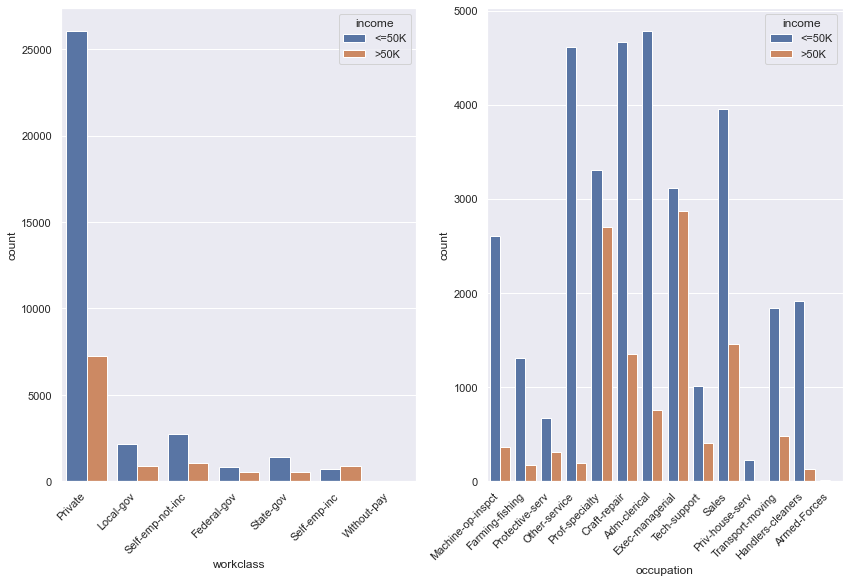

In [8]:
a4_dims = (14, 8.7)
fig, ax = plt.subplots(figsize=a4_dims, ncols=2)
workclass_chart = sns.countplot(x="workclass", hue='income',data=df, ax=ax[0])
occupation_chart = sns.countplot(x="occupation", hue='income',data=df, ax=ax[1])
workclass_chart.set_xticklabels(workclass_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
occupation_chart.set_xticklabels(occupation_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Black'),
 Text(1, 0, 'White'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'Amer-Indian-Eskimo'),
 Text(4, 0, 'Asian-Pac-Islander')]

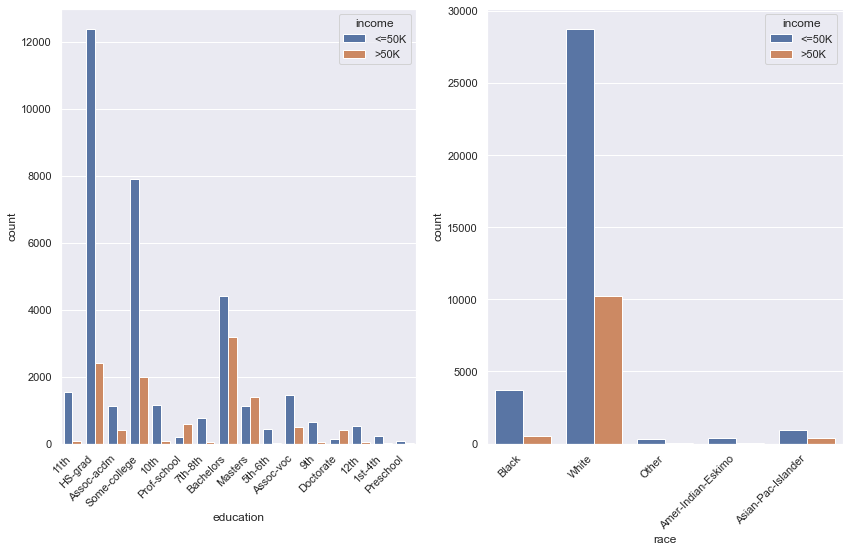

In [9]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims, ncols=2)
education_chart = sns.countplot(x="education", hue="income", data=df, ax=ax[0])
race_chart = sns.countplot(x="race", hue="income", data=df, ax=ax[1])
education_chart.set_xticklabels(education_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
race_chart.set_xticklabels(race_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [10]:
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'gender', 'native-country', 'income'] 
for c in category_col:
    print (c)
    print (df[c].value_counts())
    

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64
education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spou

<AxesSubplot:ylabel='fnlwgt'>

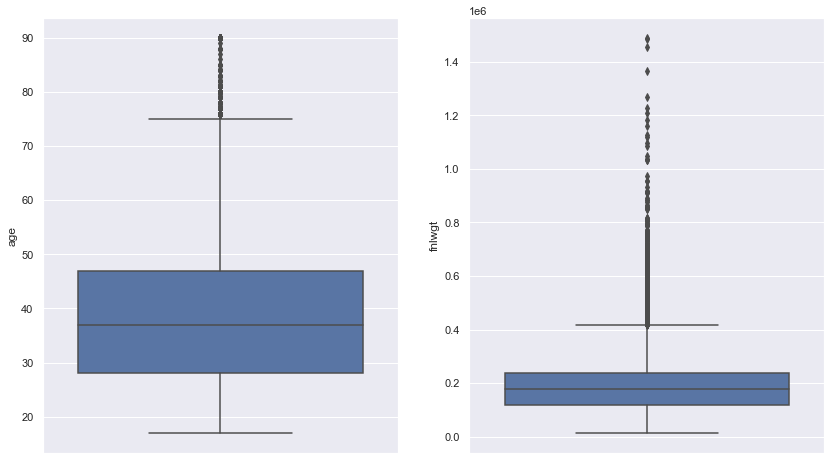

In [11]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims, ncols=2)
sns.boxplot(y=df['age'], ax=ax[0])
sns.boxplot(y=df['fnlwgt'], ax=ax[1])

### Categorical into Numerical

In [12]:
#converting income type into numerical data
encoder = LabelEncoder()
df['income'] = encoder.fit_transform(df['income'].astype('str'))
#Converting categorial data into numerical data using one-hot encoding 
df = pd.get_dummies(df)
print("Number of feautres after one-hot encoding {}".format(len(list(df))))

Number of feautres after one-hot encoding 105


In [13]:
#Test Train split 
trainset, testset = train_test_split(df,test_size = 0.33)
trainlabel = trainset.pop('income')
testlabel = testset.pop('income')
print(trainset.shape)
print(testset.shape)

(30298, 104)
(14924, 104)


## Training The Models

As of this dataset we are going to train with Four main algorithms:
- Decision Tree
- Naive Bayes
- SVM
- K-Nearest Neighbor

Will train it again each of the above mentioned algorithm Get the prediction, check the accuracy Then pick the model which has the best accuracy.

In [14]:
#Declearing Machine learning model with different algorithms
DT = DecisionTreeClassifier()
NB = GaussianNB()
KNN = KNeighborsClassifier()
LR = LinearRegression()
predictions=dict()

### Decision Tree

The accuracy score of Decision Tress is 0.8105735727686947
[[9786 1468]
 [1359 2311]]


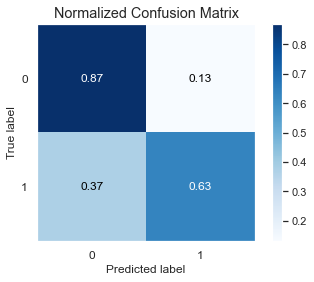

In [15]:
DT.fit(trainset,trainlabel)
prediction = DT.predict(testset)
accur = accuracy_score(testlabel, prediction) 
predictions['Decision Tree'] = accur
print("The accuracy score of Decision Tress is {}".format(accur))
print(confusion_matrix(testlabel, prediction))
skplt.metrics.plot_confusion_matrix(testlabel, prediction, normalize=True)
plt.show()

### Naive Bayes

The accuracy of Naive Bayes is 0.7873894398284642
[[10665   589]
 [ 2584  1086]]


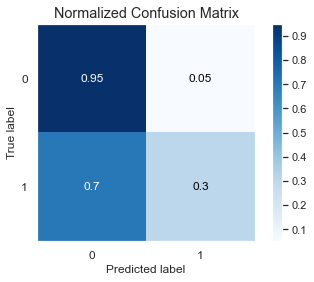

In [16]:
NB.fit(trainset, trainlabel)
prediction = NB.predict(testset)
accur = accuracy_score(testlabel, prediction) 
predictions['Naive Bayes'] = accur
print("The accuracy of Naive Bayes is {}".format(accur))
print(confusion_matrix(testlabel,prediction))
skplt.metrics.plot_confusion_matrix(testlabel, prediction, normalize=True)
plt.show()

### K-Nearest Neighbor

The accuracy of Naive Bayes is 0.7644063253819351
[[10257   997]
 [ 2519  1151]]


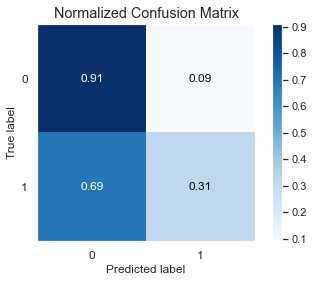

In [17]:
KNN.fit(trainset, trainlabel)
prediction = KNN.predict(testset)
accur = accuracy_score(testlabel, prediction) 
predictions['KNN'] = accur
print("The accuracy of Naive Bayes is {}".format(accur))
print(confusion_matrix(testlabel, prediction))
skplt.metrics.plot_confusion_matrix(testlabel, prediction, normalize=True)
plt.show()

### Linear Regression

The accuracy of Naive Bayes is 0.8349638166711337
[[10564   690]
 [ 1773  1897]]


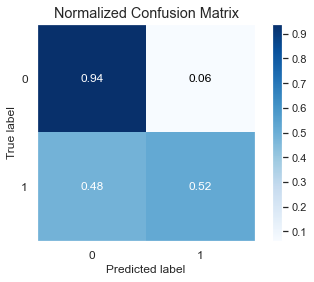

In [18]:
LR.fit(trainset,trainlabel)
prediction = LR.predict(testset)
prediction[prediction > 0.5] = 1
prediction[prediction <= 0.5] = 0
accur = accuracy_score(testlabel, prediction) 
predictions['Linear Regression'] = accur
print("The accuracy of Naive Bayes is {}".format(accur))
print(confusion_matrix(testlabel, prediction))
skplt.metrics.plot_confusion_matrix(testlabel, prediction, normalize=True)
plt.show()

### Final Analysis

In [19]:
df = pd.DataFrame(list(predictions.items()), columns=['Algorithms','Percentage'])
print(df)

          Algorithms  Percentage
0      Decision Tree    0.810574
1        Naive Bayes    0.787389
2                KNN    0.764406
3  Linear Regression    0.834964


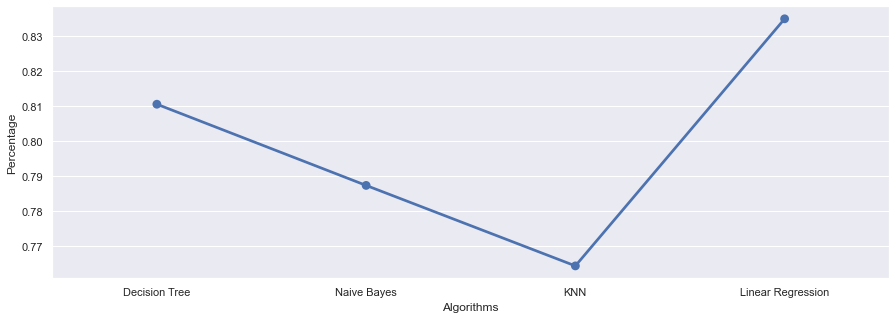

In [29]:
fig, ax1 = plt.subplots(ncols=1, sharey='none', figsize=(15,5))
sns.pointplot(x="Algorithms", y="Percentage", data=df, ax=ax1)
plt.show()

## TensorFlow Model

In [30]:
df_train = trainset.values
df_test = testset.values
df_label = tf.one_hot(trainlabel,2)
print(df_train[0].shape)
print(df_label[0].shape)

(104,)
(2,)


In [31]:
def labelMaker(val):
    if val == 0:
        return [1, 0]
    elif val == 1:
        return [0, 1]

df_labels = np.array([labelMaker(i) for i in trainlabel])
test_label = np.array([labelMaker(i) for i in testlabel])
print(df_labels[0].shape)
print(trainlabel[0].shape)
print(df_train[0].shape)

(2,)
()
(104,)


In [32]:
print(df_test.shape)
print(test_label.shape)

(14924, 104)
(14924, 2)


In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=df_train[0].shape),
    keras.layers.Dense(52, activation=tf.nn.relu),
    keras.layers.Dense(22, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), 
              loss='mean_squared_error',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 104)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 52)                5460      
_________________________________________________________________
dense_4 (Dense)              (None, 22)                1166      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 46        
Total params: 6,672
Trainable params: 6,672
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(df_train, df_labels, epochs=10, validation_data=(df_test, test_label))

Epoch 1/10
947/947 [==============================] - 2s 2ms/step - loss: 0.7512 - accuracy: 0.2488 - val_loss: 0.7541 - val_accuracy: 0.2459

In [36]:
test_loss, test_acc = model.evaluate(df_test, test_label)
print('Test accuracy:', test_acc)

467/467 [==============================] - 0s 850us/step - loss: 0.2459 - accuracy: 0.7541
Test accuracy: 0.7540873885154724


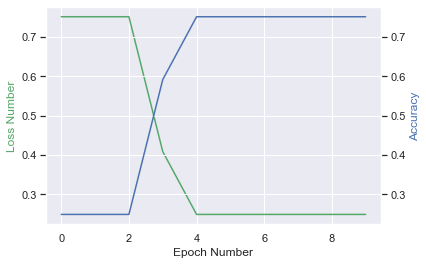

In [38]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(history.history['loss'], 'g-')
ax2.plot(history.history['accuracy'], 'b-')

ax1.set_xlabel('Epoch Number')
ax1.set_ylabel('Loss Number', color='g')
ax2.set_ylabel('Accuracy', color='b')

plt.show()